In [2]:
import pandas as  pd
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
import os 
import random


In [3]:
labels=['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train=[]
y_train=[]
image_size=150
for i in labels:
    folderpath=os.path.join('../BTC','Training',i)
    for j in tqdm(os.listdir(folderpath)):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
        
for i in labels:
    folderpath=os.path.join('../BTC','Testing',i)
    for j in tqdm(os.listdir(folderpath)):
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
    


100%|██████████| 74/74 [00:01<00:00, 61.63it/s]


In [5]:
folderpath=os.path.join('./BTC','Training',i)

In [6]:
X_train=np.array(X_train)
y_train=np.array(y_train)
type(X_train)
# X_train[:5]

numpy.ndarray

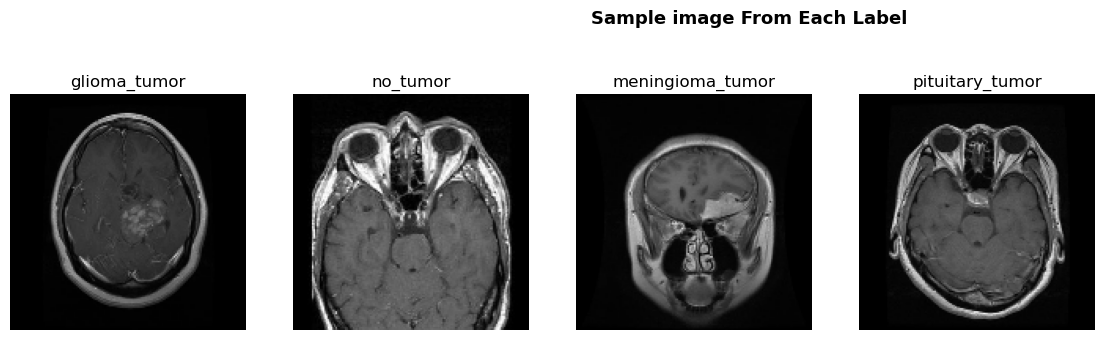

In [7]:
k=0
fig,ax=plt.subplots(1,4,figsize=(14,14))
fig.text(s='Sample image From Each Label',size=13,fontweight='bold',y=0.63,x=0.54)
for i in labels:
    j=0
    while True:
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1
        

In [8]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train,random_state=101)

In [9]:
X_train.shape
y_train.shape

(3264,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train ,test_size=0.1,random_state=101)

In [11]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new

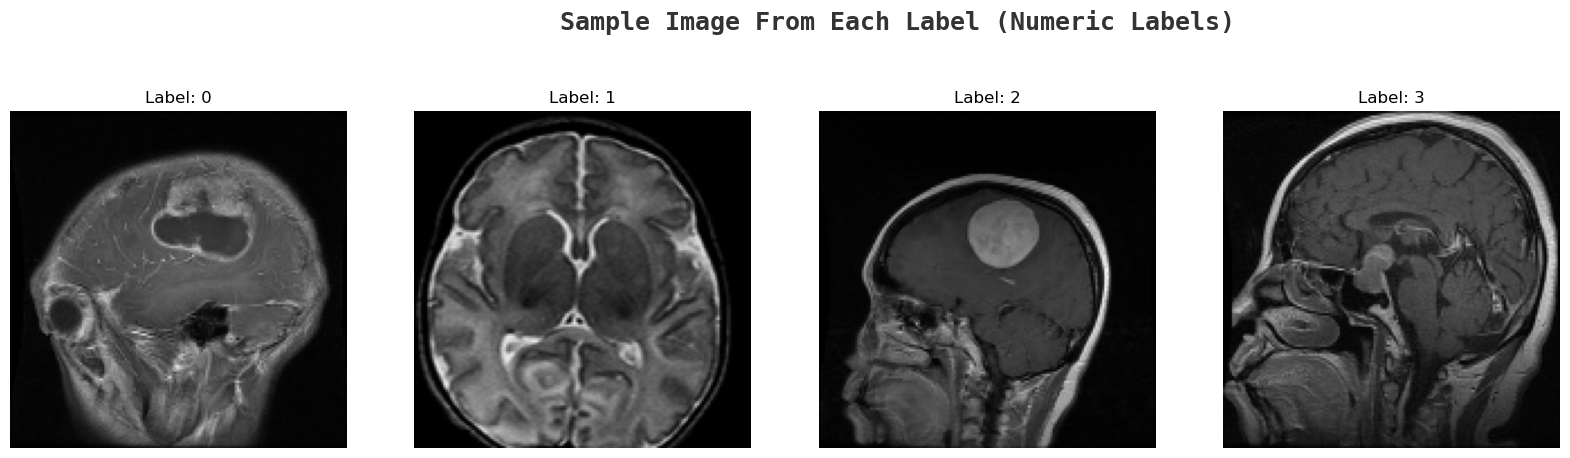

In [12]:
k = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.text(s='Sample Image From Each Label (Numeric Labels)', size=18, fontweight='bold',
         fontname='monospace', color='black', y=0.62, x=0.4, alpha=0.8)

for label_index in range(4):  # For numeric labels 0, 1, 2, 3
    j = 0
    while True:
        if y_train[j] == label_index:
            ax[k].imshow(X_train[j])
            ax[k].set_title(f"Label: {label_index}")  # Show numeric label
            ax[k].axis('off')
            k += 1
            break
        j += 1

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

In [14]:
y_train=tf.keras.utils.to_categorical(y_train)

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.models import Model 
effnet=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
x=effnet.output
x=GlobalAveragePooling2D()(x)
x=Dropout(0.5)(x)
x=Dense(4,activation='softmax')(x)
model=Model(inputs=effnet.input,outputs=x)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,TensorBoard,ModelCheckpoint

In [33]:
tensordboard=TensorBoard(log_dir='logs')#shows loss accuracy grphs
checkpoint=ModelCheckpoint('effnet.keras',monitor='val_accuracy',save_best_only=True ,mode='auto',verbose=1) #saves the best model
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.3,patience=2,min_delta=0.001,mode='auto',verbose=1) #If validation accuracy doesn't improve for 2 epochs, it reduces learning rateby 30%.


In [34]:


history=model.fit(X_train,y_train,validation_split=0.1,epochs=4,verbose=1,batch_size=32,callbacks=[tensordboard,checkpoint,reduce_lr])

Epoch 1/4
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9771 - loss: 0.0691
Epoch 1: val_accuracy improved from -inf to 0.92857, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9770 - loss: 0.0695 - val_accuracy: 0.9286 - val_loss: 0.5245 - learning_rate: 0.0010
Epoch 2/4
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9814 - loss: 0.0496
Epoch 2: val_accuracy improved from 0.92857 to 0.93197, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9814 - loss: 0.0497 - val_accuracy: 0.9320 - val_loss: 0.5179 - learning_rate: 0.0010
Epoch 3/4
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9660 - loss: 0.1218
Epoch 3: val_accuracy did not improve from 0.93197
83/83 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9660 - loss: 0.1216 - val_accuracy: 0.8707 - val_loss: 0.9653 - learning_rate: 0.0010
Epoch 4/4
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9794 - loss: 0.0761
Epoch 4: val_accuracy improved fro

In [39]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

# y_test is already in correct format
y_test_new = y_test


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step



In this,
0 - Glioma Tumor
1 - No Tumor
2 - Meningioma Tumor
3 - Pituitary Tumor

In [42]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# If y_test_new is in string format, you can encode it
encoder = LabelEncoder()
y_test_new = encoder.fit_transform(y_test_new)

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        93
           1       0.08      0.05      0.06        96
           2       0.00      0.00      0.00        51
           3       1.00      0.98      0.99        87

    accuracy                           0.54       327
   macro avg       0.52      0.49      0.50       327
weighted avg       0.58      0.54      0.55       327



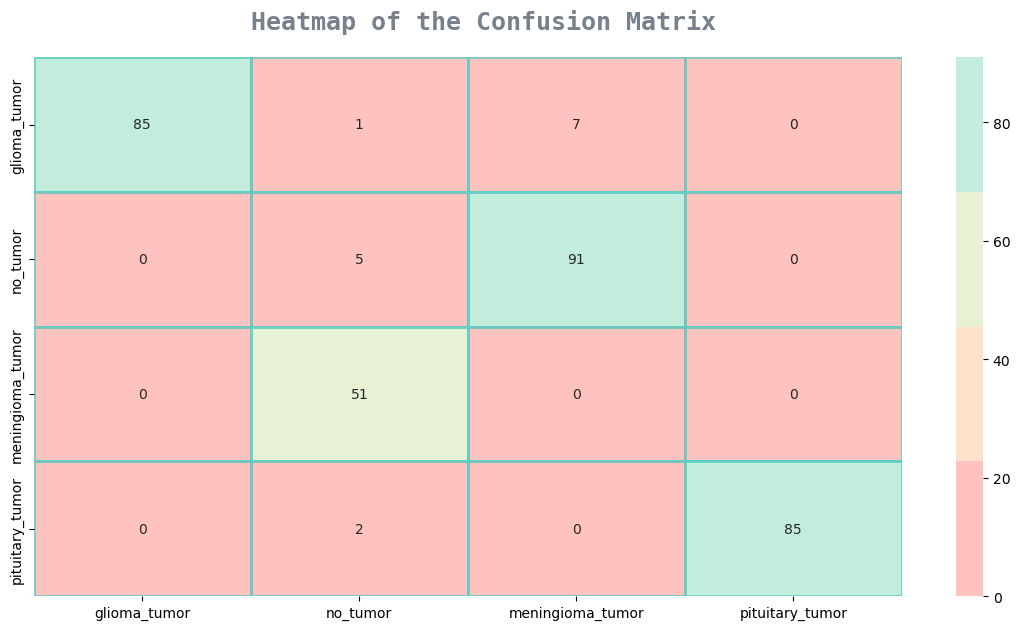

In [45]:
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[2])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [56]:
from IPython.display import display,clear_output
import io
from PIL import Image
import ipywidgets as widgets
from warnings import filterwarnings
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])